# Название проекта
Рынок заведений общественного питания Москвы.

## Описание проекта
Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Я — гуру аналитики, и партнёры просят меня подготовить исследование рынка. У меня есть открытые данные о заведениях общественного питания в Москве.

## Цель проекта
Провести исследование рынка, дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети. Подготовить презентацию.

# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
pd.set_option('display.float_format', '{:,.2f}'.format)
data = pd.read_csv('rest_data.csv')
pd.options.display.max_colwidth = 150
display(data)
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


У нас есть таблица rest_data, где:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

Пропусков в таблице нет. Посмотрим на дубликаты:

In [2]:
print(data.duplicated().sum())# подсчёт явных дубликатов

0


Явных дубликатов нет, поищем другие проблемы.

In [3]:
data.query('chain == "да"').groupby('object_name').agg({'object_type': 'count'}).sort_values(by= 'object_type')

,object_type
object_name,
Beverly Hills Diner,1
Мюнгер,1
Му-му,1
Молли гвинз,1
Мираторг,1
...,...
Домино'с Пицца,86
Макдоналдс,122
Бургер Кинг,122


Сначала сделаем все слова со строчными буквами в названии. Потом уберем кавычки, апостроф, точку, запятую и слова кафе, ресторан, бар, закусочная, корчма, кофейня, кондитерская, пиццерия, пбо и предприятие быстрого обслуживания из названий заведений.

In [4]:
data['object_name'] = data['object_name'].str.lower()
data.head(5)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


А теперь уберем дополнения в названиях

In [5]:
for name in ['"', '»', '«',"'", '.', ',', 'кафе', 'ресторан', 'бар','закусочная', 'корчма', 'кофейня', 'кондитерская', 'пиццерия', 'пбо', 'предприятие быстрого обслуживания', 'быстрого питания', 'волгоградский', 'покрышкина',' ', '-']:
         data['object_name'] = data['object_name'].str.replace(name, '')
data.head(5)        

C:\Users\Igor\AppData\Local\Temp/ipykernel_2868/532160144.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['object_name'] = data['object_name'].str.replace(name, '')


,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,вишневаяметель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [6]:
fake_chain = data.query('chain == "да"').groupby('object_name').agg({
    'object_type': 'count'
}).sort_values(by= 'object_type').query('object_type == 1')
fake_chain

,object_type
object_name,
beverlyhillsdiner,1
гурмания,1
даблбиблэк,1
пикколо,1
пестоимитлес,1
...,...
vietcafeвьет,1
whiterabbite(белыйкролик),1
шантимель(кондитерские),1


У нас есть 205 объектов, которые называют себя сетевыми, но имеют одно заведение в сети. В ходе избавления от слов кафе и т.д. у нас пропали скорее всего названия у некоторых объектов совсем.

In [7]:
data.query('object_name == ""')

,id,object_name,chain,object_type,address,number
20,21950,,нет,кафе,"город Москва, Алтайская улица, дом 33/7",30
238,27703,,нет,столовая,"город Москва, улица Бориса Галушкина, дом 26",45
347,130124,,нет,кафе,"город Москва, улица Дыбенко, дом 44",40
361,25493,,нет,ресторан,"город Москва, Заревый проезд, дом 12",200
411,23869,,нет,кафе,"город Москва, Керченская улица, дом 1А, корпус 3",50
...,...,...,...,...,...,...
15007,219569,,нет,кафе,"город Москва, Береговой проезд, дом 5А, корпус 1",2
15008,219570,,нет,кафе,"город Москва, Береговой проезд, дом 5А, корпус 1",4
15011,206099,,нет,закусочная,"город Москва, поселение Сосенское, посёлок Коммунарка, улица Александры Монаховой, дом 92, корпус 1",0
15014,210231,,нет,кафе,"город Москва, Люблинская улица, владение 60, строение 1/1",20


Безымянные объекты мы удалим, их всего лишь 402 штуки(незначительное кол-во), а оставшиеся фэйковые сетевые сделаем несетевыми.

In [8]:
data['object_name'].replace('', np.nan, inplace=True)
data.dropna(subset=['object_name'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14964 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14964 non-null  int64 
 1   object_name  14964 non-null  object
 2   chain        14964 non-null  object
 3   object_type  14964 non-null  object
 4   address      14964 non-null  object
 5   number       14964 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 818.3+ KB


In [9]:
fake_chain.index
data.loc[data['object_name'].isin(fake_chain.index), 'chain'] = 'нет'

И проверим, остались ли такие "сети".

In [10]:
data.query('chain == "да"').groupby('object_name').agg({
    'object_type': 'count'
}).sort_values(by= 'object_type').query('object_type == 1')

,object_type
object_name,


## Выводы предобработки

In [11]:
data['object_name'].nunique()

9043

Мы проверили данные не явные дубликаты и их не оказалось, потом обнаружились фэйковые сетевые заведения, их количество удалось снизить до 205 штук, путем приведения всех названий к единому стилю, а эти 205 заведений были отправлены в несетевые, безымянные заведения были уделены из данных, благо их было около 3 процентов от всех данных. На данный момент имеем 9043 уникальных названий заведений. Данные идеальными сделать не получится, можно приступать к анализу данных.

# Анализ данных

## Количество заведений по видам объектов и по сетевым/несетевым

Посмотрим соотношение видов объектов общественного питания по количеству и построим график. А также посмотрим на соотношение сетевых и несетевых заведений по количеству.

chain,да,нет,total,да(%),нет(%)
object_type,,,,,
кафе,1292,4514,5806,0.22,0.78
столовая,3,2578,2581,0.00,1.00
ресторан,487,1785,2272,0.21,0.79
предприятие быстрого обслуживания,776,1121,1897,0.41,0.59
бар,25,809,834,0.03,0.97
буфет,11,568,579,0.02,0.98
кафетерий,46,335,381,0.12,0.88
закусочная,50,293,343,0.15,0.85
магазин (отдел кулинарии),73,198,271,0.27,0.73


Text(0.5, 0, 'Кол-во заведений')

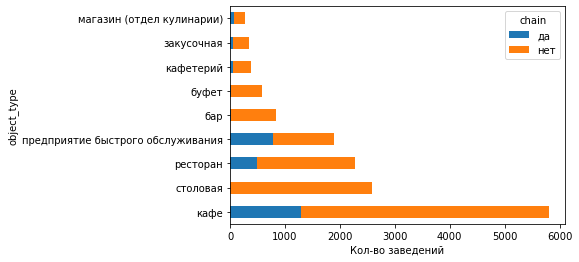

In [12]:
report = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='nunique')
report['total'] = report['да'] + report['нет']
report['да(%)'] = report['да']/report['total']
report['нет(%)'] = report['нет']/report['total']
report = report.sort_values(by='total', ascending=False)
display(report)

report[['да', 'нет']].plot(kind='barh', stacked=True)
plt.xlabel("Кол-во заведений")

Как мы можем видеть, наибольшее количество заведений из сетевых у типа кафе, но в процентном соотношении относительно заведений в типе, у предприятий быстрого питания 41% заведений относится к сетевым, а у кафе таких заведений всего лишь 22%.

## Параметры сетевых заведений

Посмотрим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [13]:
data_chain = data.query('chain == "да"')
data_chain = data_chain.groupby('object_name').agg({'id': 'count', 'number':'mean'})
display(data_chain)

,id,number
object_name,,
bocconcino,3,66.67
burgerclub,3,20.33
coffeeshopcompany,4,47.25
cofix,25,9.60
correas,3,44.00
...,...,...
штолле,17,27.82
якитория,48,115.12
янпримус,2,200.00


Чтобы определить рамки "мало" и "много"
Найдем 25 процентиль для количества посадочных мест в сетевых заведениях.

In [14]:
data_chain['number'].describe()

count   206.00
mean     56.98
std      47.96
min       0.00
25%      20.06
50%      43.50
75%      81.13
max     245.00
Name: number, dtype: float64

А для количества заведений возьмем медианное значение

In [15]:
data_chain['id'].describe()

count   206.00
mean     13.41
std      27.95
min       2.00
25%       2.00
50%       4.00
75%       9.00
max     183.00
Name: id, dtype: float64

,Число сетей,Медианное число заведений,Медианное число посадочных мест
Группа,,,
Мало заведений - Мало мест,26,2.00,13.25
Мало заведений - Много мест,80,2.00,60.17
Много заведений - Мало мест,26,11.50,11.75
Много заведений - Много мест,74,9.00,57.99


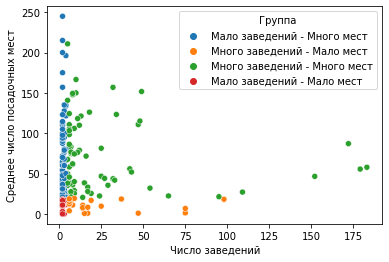

In [16]:
data_chain['rest_num_group'] = 'Мало заведений'
data_chain.loc[data_chain['id'] > 4, 'rest_num_group'] = 'Много заведений'

data_chain['seat_num_group'] = 'Мало мест'
data_chain.loc[data_chain['number'] > 20, 'seat_num_group'] = 'Много мест'
data_chain['Группа'] = data_chain['rest_num_group'].astype(str) + ' - ' + data_chain['seat_num_group'].astype(str)
sns.scatterplot(data=data_chain, x='id', y='number', hue='Группа')
plt.xlabel('Число заведений'), plt.ylabel('Среднее число посадочных мест')

data_chain.reset_index().groupby('Группа').agg({'object_name':'nunique', 'id':'median', 'number':'median'})\
                                          .rename(columns={'object_name':'Число сетей',
                                                          'id':'Медианное число заведений',
                                                          'number':'Медианное число посадочных мест'})


По таблице и графикам можно видеть, что для сетевых заведений наиболее характерно наибольшее количество мест в заведениях, вне зависимости от количества заведений. А наименее характерно маленькое число посадочных мест.

## Среднее число посадочных мест по видам объектов 

Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Посмотрим какой вид предоставляет в среднем самое большое количество посадочных мест и построим графики.

,number
object_type,
столовая,130.45
ресторан,97.01
буфет,51.49
бар,44.01
кафе,40.37
предприятие быстрого обслуживания,20.70
кафетерий,9.11
закусочная,7.83
магазин (отдел кулинарии),5.54


Text(0.5, 0, 'Посадочных мест')

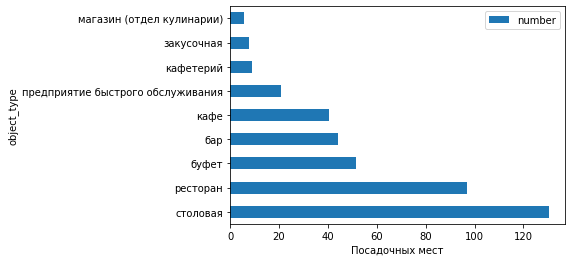

In [17]:
data_vidi = data.groupby('object_type').agg({'number':'mean'}).sort_values(by='number', ascending=False)
display(data_vidi)
data_vidi.plot(kind='barh', stacked=True)
plt.xlabel('Посадочных мест')

Можно видеть, что наибольшее среднее количество посадочных мест в заведениях типа столовые(у них в среднем 130 посадочных мест), дальше идут рестораны(у них в среднем 100 посадочных мест), дальше буфеты, бары, кафе имеют в районе 40-50 посадочных мест в среднем.
Теперь выделим в отдельный столбец информацию о улице на которой находится заведение. Это нам необходимо для дальнейшего анализа.

In [18]:
data['street'] = data['address'].apply(lambda x: x.split(',')[1])
data['street'] = data['street'].str.strip()
data.head(5)

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,академия,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,вишневаяметель,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


##  Tоп-10 улиц по количеству объектов общественного питания

Добавим районы из внешнего источника.

In [19]:
from io import BytesIO
import requests

In [20]:
spreadsheed_id = '1ehA935smfoQrLsg6tg-1z2E9BbAQyvdxaF5Qx7ZNgbY'
file_name = 'https://docs.google.com/spreadsheets/d/1ehA935smfoQrLsg6tg-1z2E9BbAQyvdxaF5Qx7ZNgbY/export?format=csv'.format(spreadsheed_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.sample(10)

,streetname,areaid,okrug,area
323,Большая Никитская улица,19,ЦАО,Тверской район
2578,проспект Мира,79,СВАО,Останкинский район
1681,Советская улица,43,ЗАО,Район Внуково
2127,1-я Хуторская улица,65,САО,Савеловский район
3503,1-я Кабельная улица,114,ЮВАО,Район Лефортово
377,Москворецкая набережная,19,ЦАО,Тверской район
1828,улица Радио,13,ЦАО,Басманный район
3196,3-й Павелецкий проезд,98,ЮАО,Даниловский район
988,Зверинецкая улица,36,ВАО,Район Соколиная Гора
2030,Левобережная улица,68,САО,Район Ховрино


Найдем топ-10, а потом, объеденим с таблицей с районами.

,id
street,
город Зеленоград,232
проспект Мира,199
Профсоюзная улица,178
Ленинградский проспект,171
Пресненская набережная,167
Варшавское шоссе,153
Ленинский проспект,146
поселение Сосенское,124
проспект Вернадского,124


Text(0.5, 0, 'Число заведений')

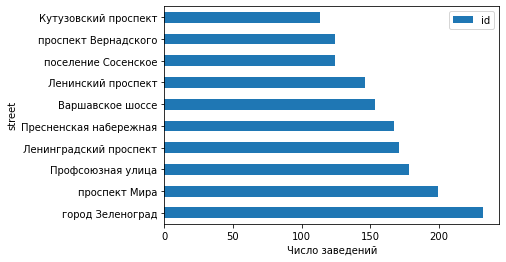

In [21]:
top_10 = data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False)
display(top_10.head(10))
top_10.head(10).plot(kind='barh', stacked=True)
plt.xlabel('Число заведений')

In [22]:
street = top_10.head(10).index
#df_top_10 = pd.DataFrame(data=None)
# for i in street:
#     df_top_10 = pd.concat([df_top_10, df.query('streetname == @i')])
#df_top_10 = pd.concat([df_top_10, df.query('streetname in @street')])
df_top_10 = df.query('streetname in @street')
top_10_merge = df_top_10.merge(top_10, left_on='streetname',right_on='street', how='left')
top_10_merge = top_10_merge.drop(['areaid'], 1)
display(top_10_merge.sort_values(by='id', ascending=False))    

C:\Users\Igor\AppData\Local\Temp/ipykernel_2868/3807506266.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  top_10_merge = top_10_merge.drop(['areaid'], 1)


,streetname,okrug,area,id
10,город Зеленоград,Зеленоград,Панфиловский район,232
8,город Зеленоград,Зеленоград,Район Крюково,232
9,город Зеленоград,Зеленоград,Район Матушкино-Савелки,232
18,проспект Мира,СВАО,Останкинский район,199
17,проспект Мира,СВАО,Район Марьина роща,199
16,проспект Мира,СВАО,Ярославский Район,199
15,проспект Мира,СВАО,Алексеевский район,199
20,проспект Мира,СВАО,Район Свиблово,199
43,проспект Мира,ЦАО,Мещанский район,199
19,проспект Мира,СВАО,Район Ростокино,199


Таким образом найден топ-10 улиц с наибольшим количеством заведений на них, а также определены районы, в которых находятся эти улицы. Так как улицы длинные и проходят через несколько районов, получилось дублирование - некоторые улицы находятся в нескольких районах.

## Улицы и районы с одним объектом общественного питания

Найдем число улиц с одним объектом общественного питания и в каком числе районов Москвы находятся эти улицы.

In [23]:
# поиск улиц с одним общепитом
streets_one_res = data.groupby('street').agg({'id': 'count'}).sort_values(by = 'id', ascending=False).query('id == 1').reset_index()
streets_one_res['street'].count()

573

In [24]:
# поиск районов с такими улицами 
dist_count = streets_one_res.merge(df, left_on='street',right_on='streetname', how='left')
dist_count.dropna()
dist_count['area'].nunique()

99

Таким образом, у нас получилось 573 улицы с одним общепитом и 99 районов, где есть улица/улицы с одним общепитом.

## Распределение количества посадочных мест для улиц с большим количеством общепитов

Посмотрим на распределение количества посадочных мест для улиц с наибольштм количеством объектов общественного питания.

<function matplotlib.pyplot.show(close=None, block=None)>

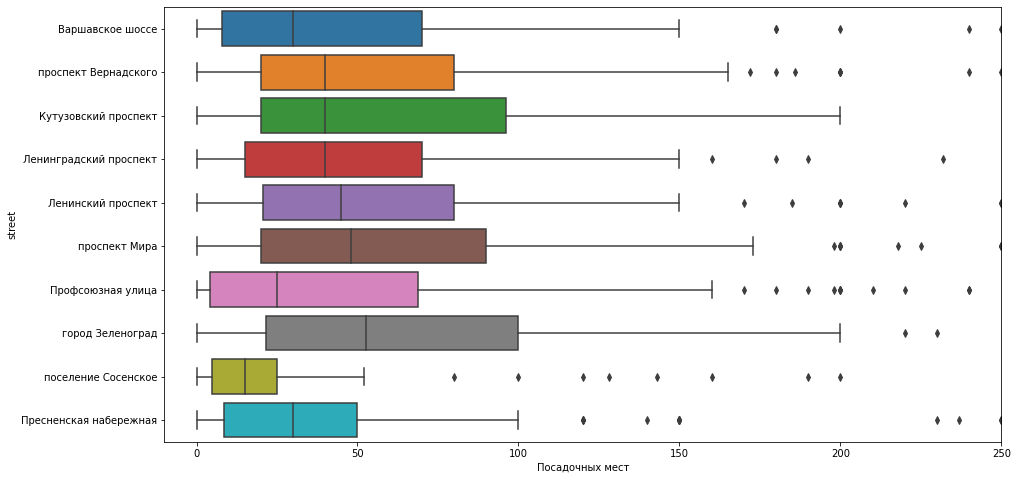

In [25]:
data_rasp = data.query('street in @street')
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='number', y='street',data=data_rasp, orient="h")
plt.xlabel('Посадочных мест')
plt.xlim(-10,250)
plt.show

Можно заметить, что медианное количество посадочных мест для топ 10 улиц в районе 30-50 мест, в поселении Сосенкое оно поменьше. Выбросы уже начинаются со значений примерно в 150 мест. Межквартильный размах в основном не выходит за пределы диапазона 20-100 мест.

# Вывод

Проведя исследования рынка, можно сказать, что если мы открываем небольшое кафе в Москве, то стоит обратить внимание на такие виды заведений, как кафе, ресторан и бар. В остальных заведениях либо формат подачи самообслуживание, либо они сетевые и крупные. Количество посадочных мест не должно быть выше 50 для начала бизнеса, а при расширении наше заведение не будет сильно выбиваться из средних для наших видов заведений, которые мы определили выше, единственное что если мы открываем ресторан, то мы можем поднять количество посадочных мест до 90-100. Самые популярные улицы в городе:
- город Зеленоград 
- проспект Мира
- Профсоюзная улица 
- Ленинградский проспект
- Пресненская набережная
- Варшавское шоссе
- Ленинский проспект
- поселение Сосенское
- проспект Вернадского
- Кутузовский проспект

На них заведений больше ста. А район можно посмотреть в разделе "Tоп-10 улиц по количеству объектов общественного питания".
При дальнейшем развитии как сети, можно оставать в таком же диапазоне посадочных, потому что у сетей с большим кол-вом заведений и у сетей с маленьким количеством заведений число посадочных мест в среднем около 50. Если мы будем развиваться как сеть, то нам нужно будет оставаться в "популярных" местах, поэтому для развития сети топ-10 улиц подойдет.

Презентация: <https://disk.yandex.ru/i/GBGLyveAuCEDrg> 